# Análise final sobre áudios

In [19]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import spacy
nlp = spacy.load('pt')
import nltk
nltk.download('stopwords')
nltk.download('rslp')

# exibe os plots no notebook
%matplotlib inline 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lenno\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


### Obtendo informações do áudio com `ffprobe`

In [20]:
!ffprobe -i 'audios/AUDIO1.mp3' -print_format 'json' -show_streams 

ffprobe version git-2020-02-11-f15007a Copyright (c) 2007-2020 the FFmpeg developers
  built with gcc 9.2.1 (GCC) 20200122
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libmfx --enable-ffnvcodec --enable-cuvid --enable-d3d11va --enable-nvenc --enable-nvdec --enable-dxva2 --enable-avisynth --enable-libopenmpt --enable-amf
  libavutil      56. 39.100

### Exibindo o `comprimento da matriz de áudio` e a `taxa de amostragem`

In [21]:
x1, sample_rate1 = librosa.load('audios/AUDIO1.mp3')
print(x1.shape)
print(sample_rate1)

(1399205,)
22050


### Exibe o sinal para verificação

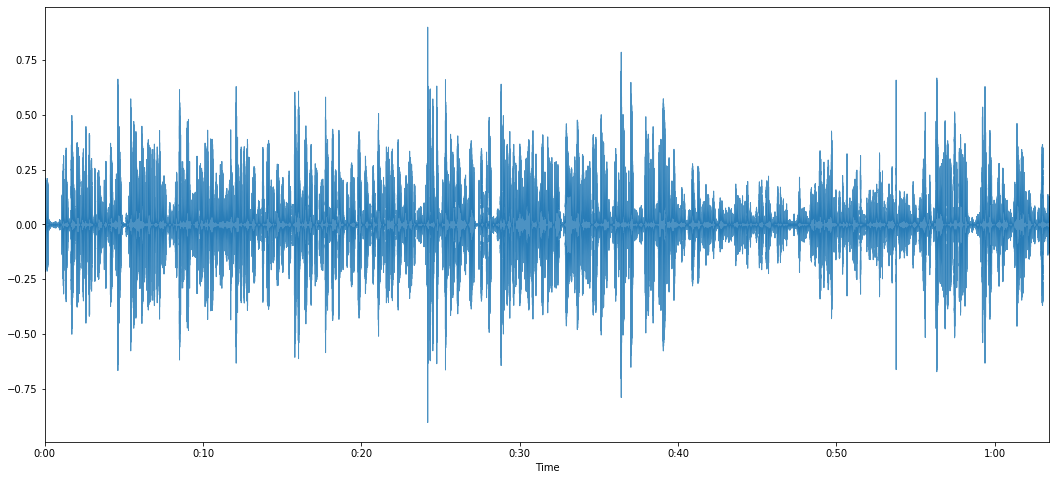

In [22]:
plt.figure(figsize=(18, 8))
librosa.display.waveplot(x1, sr=sample_rate1, alpha=0.8)
plt.show()

### Calcula a energia e exibe o resultado

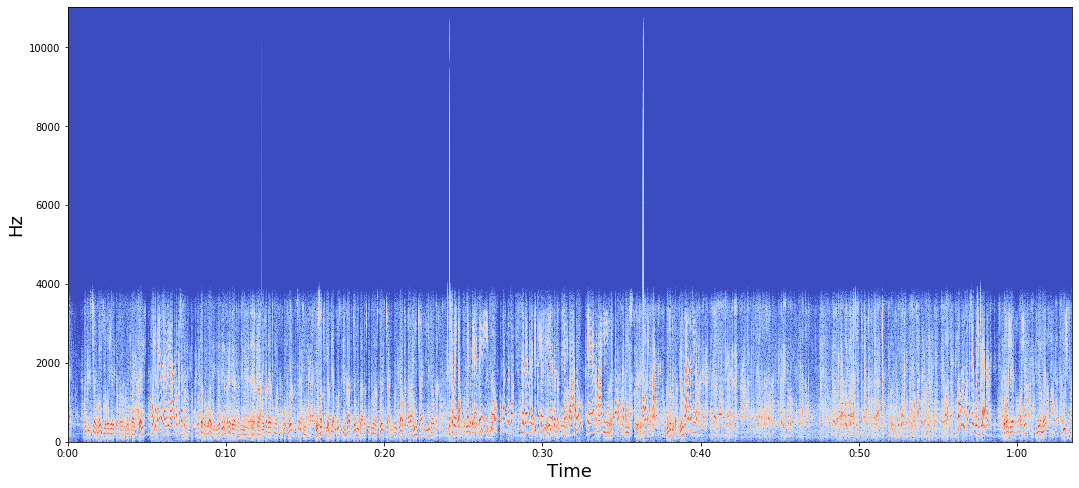

In [23]:
plt.figure(figsize=(18, 8))

X1 = librosa.stft(x1)
Xdb1 = librosa.amplitude_to_db(X1)
Xdb1 = librosa.amplitude_to_db(np.abs(X1))
librosa.display.specshow(Xdb1, sr=sample_rate1, x_axis='time', y_axis='hz')

plt.xlabel('Time', fontsize = 18), plt.ylabel('Hz', fontsize = 18)
plt.show()

### Analisando palavras do audio

In [24]:
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words = stop_words + ['']

In [25]:
def lemmatizer(text):
    sent = []
    doc = nlp(text)
    for word in doc:
        if word.pos_ == "VERB":
            sent.append(word.lemma_)
        else:
            sent.append(word.orth_)
    return " ".join(sent)

In [26]:
audio = open("./audios/audio01.txt", "r", encoding='utf-8')
audio_text = audio.read()

In [27]:
audio_transform = [text.lower() for text in audio_text.split(' ')]

In [28]:
audio_transform = [text for text in audio_transform if not text in stop_words]

In [29]:
audio_transform = [lemmatizer(text) for text in audio_transform]

In [30]:
from unidecode import unidecode
audio_transform = [unidecode(text) for text in audio_transform]

In [31]:
from collections import Counter
c = Counter(audio_transform)

In [32]:
most_commons_words = c.most_common()
most_commons_words

[('rogerio', 3),
 ('bem', 2),
 ('dois', 2),
 ('alta', 2),
 ('cristiane', 1),
 ('bom', 1),
 ('dia', 1),
 ('khan', 1),
 ('falar', 1),
 ('fazer', 1),
 ('brigar', 1),
 ('ca', 1),
 ('ano', 1),
 ('estadao', 1),
 ('goles', 1),
 ('empresas', 1),
 ('reves', 1),
 ('fran', 1),
 ('contra', 1),
 ('gana', 1),
 ('conforto', 1),
 ('votos', 1),
 ('dias', 1),
 ('via', 1),
 ('possibilidade', 1),
 ('mudadas', 1),
 ('poltronas', 1),
 ('diarios', 1),
 ('tirar', 1),
 ('n este', 1),
 ('avental', 1),
 ('negar', 1),
 ('elevar', 1),
 ('hits', 1),
 ('sharp', 1),
 ('reserva', 1),
 ('vistoriar', 1),
 ('meia', 1),
 ('quatro', 1),
 ('trabalho', 1),
 ('tabao', 1),
 ('momento', 1),
 ('obrigar', 1),
 ('nada', 1),
 ('gina', 1),
 ('cristao', 1),
 ('nulo', 1),
 ('passageiro', 1),
 ('pra', 1),
 ('gente', 1),
 ('rezar', 1),
 ('chance', 1),
 ('ne', 1),
 ('de .', 1)]

In [33]:
most_common_list = []

In [34]:
for word, count in most_commons_words[:20]:
    most_common_list.append(word)

In [35]:
most_common_string = (" ").join(most_common_list)

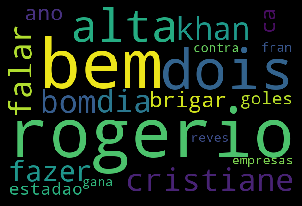

In [36]:
wordcloud = WordCloud(width=600, height=400).generate(most_common_string)

plt.figure(figsize=(4,4), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()